# Assignment 7

Andrew Loeppky

ATSC 595 - Dr. R. Stull

Fall 2021

### Part A(1)

For each chemical reaction { } listed above, how many eqs apply, and what is the resulting total number of equations?

**{01'}** 1 R definition, 3 rate eqs = 4 equations


**{03}** 1 R definition, 3 rate eqs = 4 equations


**{09}** 1 R def, 2 rate eqs = 3 equations


**{11}** 1 R def, 2 rate eqs = 3 equations


**{25}** 1 R def, 4 rate eqs = 5 equations


**{123}** 1 R def, 3 rate eqs = 4 equations


**Total** = 23

### Part A(2) 

For each one of the 7 chemicals that we want to forecast, how many R production/loss terms apply?

$CO$ - 0 prod, 1 loss

$HO_2$ - 1 prod, 1 loss

$NO$ - 1 prod, 2 loss

$NO_2$ - 2 prod, 1 loss

$O_{1D}$ - 1 prod, 1 loss

$O_3$ - 1 prod, 2 loss

$OH$ - 2 prod, 1 loss


### Part B

Write all of the reaction eqs (similar to {25.0 to 25.4} shown above).
But don't include reaction eqs for items in parenthesis ( ), or for
any variable we assume is constant.

#### Equation {01'}

$$
R_{01} = j_{01}[NO_2]\tag{01.0}
$$

$$
\dot{[NO_2]} = -R_{01}\tag{01.1}
$$

$$
\dot{[NO]} = R_{01}\tag{01.2}
$$

$$
\dot{[O_3]} = R_{01}\tag{01.3}
$$

#### Equation {03}

$$
R_{03} = k_{03}[O_3][NO]\tag{03.0}
$$

$$
\dot{[O_3]} = -R_{03}\tag{03.1}
$$

$$
\dot{[NO]} = -R_{03}\tag{03.2}
$$

$$
\dot{[NO_2]} = R_{03}\tag{03.3}
$$

#### Equation {09}

$$
R_{09} = j_{09}[O_3]\tag{09.0}
$$

$$
\dot{[O_3]} = -R_{09}\tag{09.1}
$$

$$
\dot{[O_{1D}]} = R_{09}\tag{09.2}
$$

#### Equation {11}

$$
R_{11} = k_{11}[O_{1D}][H_2O]\tag{11.0}
$$

$$
\dot{[O_{1D}]} = -R_{11}\tag{11.1}
$$

$$
\dot{[OH]} = 2R_{11}\tag{11.2}
$$

#### Equation {25}

$$
R_{25} = k_{25}[HO_2][NO]\tag{25.0}
$$

$$
\dot{[OH]} = R_{25}\tag{25.1}
$$

$$
\dot{[NO_2]} = R_{25}\tag{25.2}
$$

$$
\dot{[HO_2]} = -R_{25}\tag{25.3}
$$

$$
\dot{[NO]} = -R_{25}\tag{25.4}
$$

#### Equation {123}

$$
R_{123} = k_{123}[OH][CO]\tag{123.0}
$$

$$
\dot{[OH]} = -R_{123}\tag{123.1}
$$

$$
\dot{[CO]} = - R_{123}\tag{123.2}
$$

$$
\dot{[HO_2]} = R_{123}\tag{123.3}
$$

### Part C

In your favorite programming language, write into your computer
program the finite difference form of the forecast eqs for each
of the 7 chemicals of interest.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numba import jit

from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore') # this is potentially risky

In [2]:
####################################################################
### assign numpy indices to each species
CO = 0
HO2 = 1
NO = 2
NO2 = 3
O1D = 4
O3 = 5
OH = 6

# initialize concentration array
initconcs = np.array([2.5e12, 0.0, 1.25e12, 1.25e11, 0.0, 0.0, 0.0])

####################################################################
# initialize rate constants (treat H2O conc as a constant)
j01 = 1.0e-3  # (units 1/s) for {01'}  NO2 + h·nu -> NO + O3
k03 = 1.73e-15  # (units (s · molecules/cm^3)^-1 ) for {03}   O3 + NO -> (O2) + NO2
j09 = 1.0e-6  # (units 1/s) for {09}   O3 + h·nu -> (O2) + O1D
k11 = 2.14e-10  # (units (s · molecules/cm^3)^-1 ) for {11} O1D + H2O -> 2 OH
k25 = 8.54e-12  # (units (s · molecules/cm^3)^-1 ) for {25} HO2 + NO -> OH + NO2
k123 = 2.28e-14  # units (s · molecules/cm^3)^-1 for {123} OH +CO +(O2)-> HO2 + (CO2)
H2O = 2.5e15  # molecules / cm^3  which is 0.01% of the air at sea level

####################################################################
# Time step info
delt_s = 0.0001  # time step (s) for your iterations
tend_h = 2.0  # duration of forecast (hours)
tsave_m = 2.0  # how often (minutes) to save results to plot

# convert everything to seconds
tend = tend_h * 3600
tsave = tsave_m * 60
delt = delt_s

# tiny sim for testing code
#tend = tend / 10
#tsave = 0.1
#delt = 0.0001

In [3]:
@jit
def init(c0, tend, tsave):
    """
    concs:
        initializes a dataframe with columns for each chemical species,
        sets the first row to the specified initial concentrations c0
        
    initconcs:
        creates a 1-row array of c0 to pass to loop
    """
    time = np.arange(0, tend, tsave) # timesteps to save
    
    # create the master dataframe
    tseries = pd.DataFrame(columns=["CO", "HO2", "NO", "NO2", "O1D", "O3", "OH"], index=time)
    
    # fill first row with initial concentrations
    tseries.loc[time[0]] = c0
    
    return tseries, c0

In [4]:
@jit
def get_R(c):
    """
    calculates reaction rates based on equations xx.0 above
    """
    R01 = j01 * c[NO2]
    R03 = k03 * c[O3] * c[NO]
    R09 = j09 * c[O3]
    R11 = k11 * c[O1D] * H2O
    R25 = k25 * c[HO2] * c[NO]
    R123 = k123 * c[OH] * c[CO]
    
    return R01, R03, R09, R11, R25, R123

#### Equations for combined production/loss of each species

$
R_{CO} = -R_{123}
$

$
R_{HO2} = R_{123} - R_{25}
$

$
R_{NO} = R_{01} - R_{03} - R_{25}
$

$
R_{NO2} = -R_{01} + R_{03} + R_{25}
$

$
R_{O1D} = R_{09} - R_{11}
$

$
R_{O3} = R_{01} - R_{03} - R_{09} 
$

$
R_{OH} = 2R_{11} + R_{25} - R_{123}
$

Combine with part B equations to get the time derivative of each species:

$
\frac{d}{dt}[CO] = -k_{123}[OH][CO]
$

$
\frac{d}{dt}[HO_2] = k_{123}[OH][CO] - k_{25}[HO_2][NO]
$

$
\frac{d}{dt}[NO] = j_{01}[NO_2] - k_{03}[O_3][NO] - k_{25}[HO_2][NO]
$

$
\frac{d}{dt}[NO_2] = -j_{01}[NO_2] + k_{03}[O_3][NO] + k_{25}[HO_2][NO]
$

$
\frac{d}{dt}[O_{1D}] = j_{09}[O_3] - k_{11}[O_{1D}][H_2O]
$

$
\frac{d}{dt}[O_3] = j_{01}[NO_2] - k_{03}[O_3][NO] - j_{09}[O_3]
$

$
\frac{d}{dt}[OH] = 2k_{11}[O_{1D}][H_2O] + k_{25}[HO_2][NO] - k_{123}[OH][CO]
$



In [5]:
@jit
def step_fwd(c, delt):
    """
    this function holds all of the combined prod/loss equations
    """
    #c_new = c
    
    # get R values
    R01, R03, R09, R11, R25, R123 = get_R(c)
    # write out derivatives of each species as the sum of each relevant R value
    c_out = np.empty_like(c)
    c_out[CO] = c[CO] + delt * (-R123)
    c_out[HO2] = c[HO2] + delt * (R123 - R25)
    c_out[NO] = c[NO] + delt * (R01 - R03 - R25)
    c_out[NO2] = c[NO2] + delt * (-R01 + R03 + R25)
    c_out[O1D] = c[O1D] + delt * (R09 - R11)
    c_out[O3] = c[O3] + delt * (R01 - R03 - R09)
    c_out[OH] = c[OH] + delt * (2 * R11 + R25 - R123)
    
    ### failed code graveyard ###
    # runs real fast but produces incorrect result
    #c_new[CO] += (-(k123 * c[OH] * c[CO])) * delt
    #c_new[HO2] += ((k123 * c[OH] * c[CO]) - (k25 * c[HO2] * c[NO])) * delt
    #c_new[NO] += ((j01 * c[NO2]) - (k03 * c[O3] * c[NO]) - (k25 * c[HO2] * c[NO])) * delt
    #c_new[NO2] += (-(j01 * c[NO2]) + (k03 * c[O3] * c[NO]) + (k25 * c[HO2] * c[NO])) * delt
    #c_new[O1D] += ((j09 * c[O3]) - (k11 * c[O1D] * H2O)) * delt
    #c_new[O3] += ((j01 * c[NO2]) - (k03 * c[O3] * c[NO]) - (j09 * c[O3])) * delt
    #c_new[OH] += ((2 * k11 * c[O1D] * H2O) + (k25 * c[HO2] * c[NO]) - (k123 * c[OH] * c[CO])) * delt
    
    #c_new[0] += -(k123 * c_old[6] * c_old[0]) * delt
    #c_new[1] += (k123 * c_old[6] * c_old[0] - k25 * c_old[1] * c_old[3]) * delt
    #c_new[2] += ((j01 * c_old[3]) - (k03 * c_old[5] * c_old[2]) - (k25 * c_old[1] * c_old[3])) * delt
    #c_new[3] += (-(j01 * c_old[3]) + (k03 * c_old[5] * c_old[2]) + (k25 * c_old[1] * c_old[3])) * delt
    #c_new[4] += ((j09 * c_old[5]) - (k11 * c_old[4] * H2O)) * delt
    #c_new[5] += ((j01 * c_old[3]) - (k03 * c_old[5] * c_old[2]) - (j09 * c_old[5])) * delt
    #c_new[6] += (((2 * k11 * H2O) * c_old[4]) + (k25 * c_old[1] * c_old[3]) - (k123 * c_old[6] * c_old[0]))

    # take all negative concentrations to zero
    c_out[c_out < 0] = 0

    return c_out

In [14]:
# toy simulation
_, toy_concs = init(initconcs, tend, tsave)

In [50]:
# execute this cell as many times as you like to manually step the simulation forward
toy_concs = step_fwd(toy_concs, delt)
print(toy_concs)

[2.50000000e+12 2.48001288e-06 1.25000045e+12 1.24999550e+11
 4.37497647e-05 4.49997509e+05 3.86511376e-02]


In [8]:
@jit
def do_sim(initconcs, tend, delt, tsave):
    """
    runs simulation
    """
    # initialize
    save_concs, concs = init(initconcs, tend, tsave)
    print(concs)
    # loop over each saved timestep and save data
    for T in save_concs.index[1:]:
        clear_output()
        print(f"Simulating: {round(T / tend * 100, 3)}%")
        # number crunching
        for t in np.arange(0, tsave, delt):
            concs = step_fwd(concs, delt)
        save_concs.loc[T] = concs
    clear_output()
    print("Simulation complete")
    return save_concs

### Part D 

Iterate your eqs forward in time on the computer, using the initial conditions IC and specifications given below.

In [9]:
# full simulation (as spec'd by time step info in cell 1)
concs_out = do_sim(initconcs, tend, delt, tsave)

Simulation complete


### Part E(a)

Using your output saved from D, convert the concentrations of the following 4 variables from $c$ (molecules/cm$^3$) to mixing ratio $q$ (ppm) using the following approximate formula:

$$
q \text{ (ppm)} = c\text{ (molecules/cm}^3\text{)} \cdot (4.0e-14)
$$

In [10]:
concs_ppm = concs_out * 4.0e-14

### Part E(b)

Plot on the same one graph the following 4 concentration curves in units of ppm:  ppm_CO, ppm_NO, ppm_NO2, ppm_O3
 versus time in hours.  (Plot them only at intervals as given below
 in the specs. 

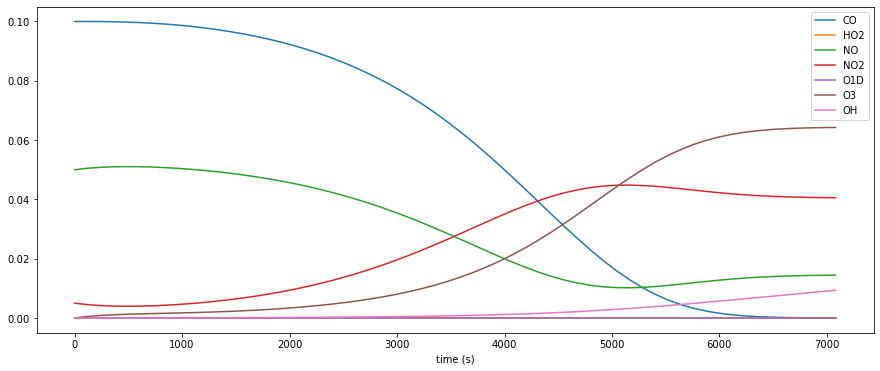

In [12]:
concs_ppm.plot(figsize=(15,6), subplots=False, xlabel="time (s)");

### Part F

Discuss the significance of your results from E.

*Initially, the abundance of CO is what characterizes the system. Any $OH$ generated by {11} and {25} is immediately consumed by {123}. {123} produces $HO_2$ which supplies {25}, producing $NO_2$, and finally $O_3$ via {01'}. When $CO_2$ runs out, the system approaches a steady state (Until a source of $CO$ turns on again). There are no direct sources of ozone, it is a secondary pollutant generated by $NO_X$ ($NO$, $NO_2$), and VOC's ($CO$ in this case)*

*This simulation is a small subset of "real" atmospheric chemistry, and is already very complex (even with simplifying assumptions like constant humidity).*